In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_pond = pd.read_csv('/content/drive/MyDrive/jala_performance_pond.csv')

In [ ]:
data_pond

,ponds_id,cycles_id,length,width,deep,total_seed,started_at,finished_at,area,padat_tebar,...,avg_hardness,avg_calcium,avg_magnesium,avg_carbonate,avg_bicarbonate,avg_tom,avg_total_plankton,ADG,SR,FCR
0,9986,18923,68.31,51.23,1.35,574000,2022-02-05 00:00:00.000000 UTC,2022-04-21 00:00:00.000000 UTC,3500.0,164.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.432527,28.660714,2.329002
1,12273,17831,36.51,27.39,1.00,75900,2022-04-11 00:00:00.000000 UTC,2022-06-25 00:00:00.000000 UTC,1000.0,75.900000,...,7000.000000,1800.000000,5200.000000,NaN,100.000000,NaN,2.000000e+04,0.244200,21.621087,4.291607
2,31460,21944,55.29,41.47,1.20,192764,2022-05-11 00:00:00.000000 UTC,2022-07-16 00:00:00.000000 UTC,1000.0,192.764000,...,5158.333333,410.333333,1153.750000,15.000000,120.666667,87.909091,1.458750e+06,0.109048,23.576496,3.070737
3,33297,15221,28.00,24.00,150.00,150000,2022-06-12 00:00:00.000000 UTC,2022-08-07 00:00:00.000000 UTC,672.0,223.214286,...,NaN,NaN,NaN,0.000000,118.000000,104.477500,1.530000e+06,0.225667,60.000000,1.367133
4,34705,17738,70.71,70.71,1.50,300000,2022-11-14 00:00:00.000000 UTC,2023-01-27 00:00:00.000000 UTC,2425.5,123.685838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266964,11.067333,1.965544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,34187,11081,35.00,35.00,1.20,188000,2022-07-07 00:00:00.000000 UTC,2022-09-20 00:00:00.000000 UTC,1225.0,153.469388,...,3300.000000,550.000000,2750.000000,3.000000,182.500000,83.250000,4.212500e+05,0.170455,8.425532,14.932576
347,36829,19252,32.00,32.00,1.30,312076,2022-11-15 00:00:00.000000 UTC,2023-02-19 00:00:00.000000 UTC,706.5,441.721161,...,5216.666667,398.333333,1566.500000,0.000000,123.769231,125.250000,8.125695e+05,0.295055,30.636264,2.866459
348,19651,21098,20.00,15.00,1.30,100000,2021-10-08 00:00:00.000000 UTC,2022-01-05 00:00:00.000000 UTC,300.0,333.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160000,8.184000,10.920455
349,20914,12856,54.00,28.00,1.50,168275,2022-07-19 00:00:00.000000 UTC,2022-09-29 00:00:00.000000 UTC,1512.0,111.292989,...,840.181818,336.818182,930.000000,30.000000,111.818182,92.545455,4.072925e+05,0.260893,61.224822,1.714601


In [ ]:
data_pond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ponds_id                 351 non-null    int64  
 1   cycles_id                351 non-null    int64  
 2   length                   351 non-null    float64
 3   width                    351 non-null    float64
 4   deep                     347 non-null    float64
 5   total_seed               351 non-null    int64  
 6   started_at               351 non-null    object 
 7   finished_at              351 non-null    object 
 8   area                     351 non-null    float64
 9   padat_tebar              351 non-null    float64
 10  cycle_day_count          351 non-null    int64  
 11  count_feed               351 non-null    int64  
 12  sum_feed_weight          351 non-null    float64
 13  count_fasting            234 non-null    float64
 14  sum_size_per_kg          3

In [ ]:
def classify_budidaya(padat_tebar):
    if padat_tebar <= 5:
        return 'Sederhana'
    elif 5 < padat_tebar <= 15:
        return 'Semi Intensif'
    elif 15 < padat_tebar <= 50:
        return 'Intensif'
    else:
        return 'Super Intensif'

data_pond['jenis_budidaya'] = data_pond['padat_tebar'].apply(classify_budidaya)

print(data_pond[['padat_tebar', 'jenis_budidaya']])

     padat_tebar  jenis_budidaya
0     164.000000  Super Intensif
1      75.900000  Super Intensif
2     192.764000  Super Intensif
3     223.214286  Super Intensif
4     123.685838  Super Intensif
..           ...             ...
346   153.469388  Super Intensif
347   441.721161  Super Intensif
348   333.333333  Super Intensif
349   111.292989  Super Intensif
350   125.000000  Super Intensif

[351 rows x 2 columns]


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    optimal_interval = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    return outliers, optimal_interval

outliers_adg_pond, optimal_adg_interval = detect_outliers_iqr(data_pond, 'ADG')
outliers_sr_pond, optimal_sr_interval = detect_outliers_iqr(data_pond, 'SR')
outliers_fcr_pond, optimal_fcr_interval = detect_outliers_iqr(data_pond, 'FCR')

outliers_counts_pond = {
    'ADG': outliers_adg_pond.shape[0],
    'SR': outliers_sr_pond.shape[0],
    'FCR': outliers_fcr_pond.shape[0]
}

print(outliers_counts_pond)
print("----------------------------------------------------------------------------------")
print(outliers_adg_pond[['ADG']].describe())
print(outliers_sr_pond[['SR']].describe())
print(outliers_fcr_pond[['FCR']].describe())
print("----------------------------------------------------------------------------------")
print("Optimal ADG :",optimal_adg_interval)
print("Optimal SR  :",optimal_sr_interval)
print("Optimal FCR :",optimal_fcr_interval)

{'ADG': 8, 'SR': 6, 'FCR': 29}
----------------------------------------------------------------------------------
            ADG
count  8.000000
mean   0.635578
std    0.340602
min   -0.072768
25%    0.528417
50%    0.679929
75%    0.805149
max    1.071429
               SR
count    6.000000
mean   117.119529
std     11.522558
min    103.832286
25%    110.388756
50%    117.003554
75%    118.771354
max    137.333333
             FCR
count  29.000000
mean   13.727595
std    10.366904
min     6.376563
25%     7.622885
50%    10.581451
75%    14.932576
max    53.412500
----------------------------------------------------------------------------------
Optimal ADG : {'lower_bound': 0.003377450096199913, 'upper_bound': 0.5103717983405485}
Optimal SR  : {'lower_bound': -25.588898823211593, 'upper_bound': 103.75919492028115}
Optimal FCR : {'lower_bound': -0.8412265930363139, 'upper_bound': 6.152088316874784}


In [ ]:
print("\nADG Outliers Values:")
print(outliers_adg_pond[['ponds_id','ADG']].sort_values(by='ADG'))

print("\nSR Outliers Values:")
print(outliers_sr_pond[['ponds_id','SR']].sort_values(by='SR'))

print("\nFCR Outliers Values:")
print(outliers_fcr_pond[['ponds_id','FCR']].sort_values(by='FCR'))


ADG Outliers Values:
     ponds_id       ADG
280     31333 -0.072768
283     32214  0.516667
274     24570  0.532333
227     31877  0.667857
338     32305  0.692001
321     33136  0.771746
177     31329  0.905357
149     32319  1.071429

SR Outliers Values:
     ponds_id          SR
106     18389  103.832286
42      34732  108.693750
234     32637  115.473774
281     32398  118.533333
12      18392  118.850695
321     33136  137.333333

FCR Outliers Values:
     ponds_id        FCR
18      31344   6.376563
7       37346   6.495381
89      31335   6.595070
306     30607   6.703704
53      37063   6.787015
213     34491   6.795299
154     38763   6.979554
108     30609   7.622885
275     32505   7.623278
102     32399   8.112500
56      32215   8.467998
98      38700   8.572000
33      12664   8.655535
341     12535   8.664399
322     34064  10.581451
348     19651  10.920455
81      34490  11.663782
115     19198  13.147491
100     19194  13.527758
250     32213  14.085714
338     3230

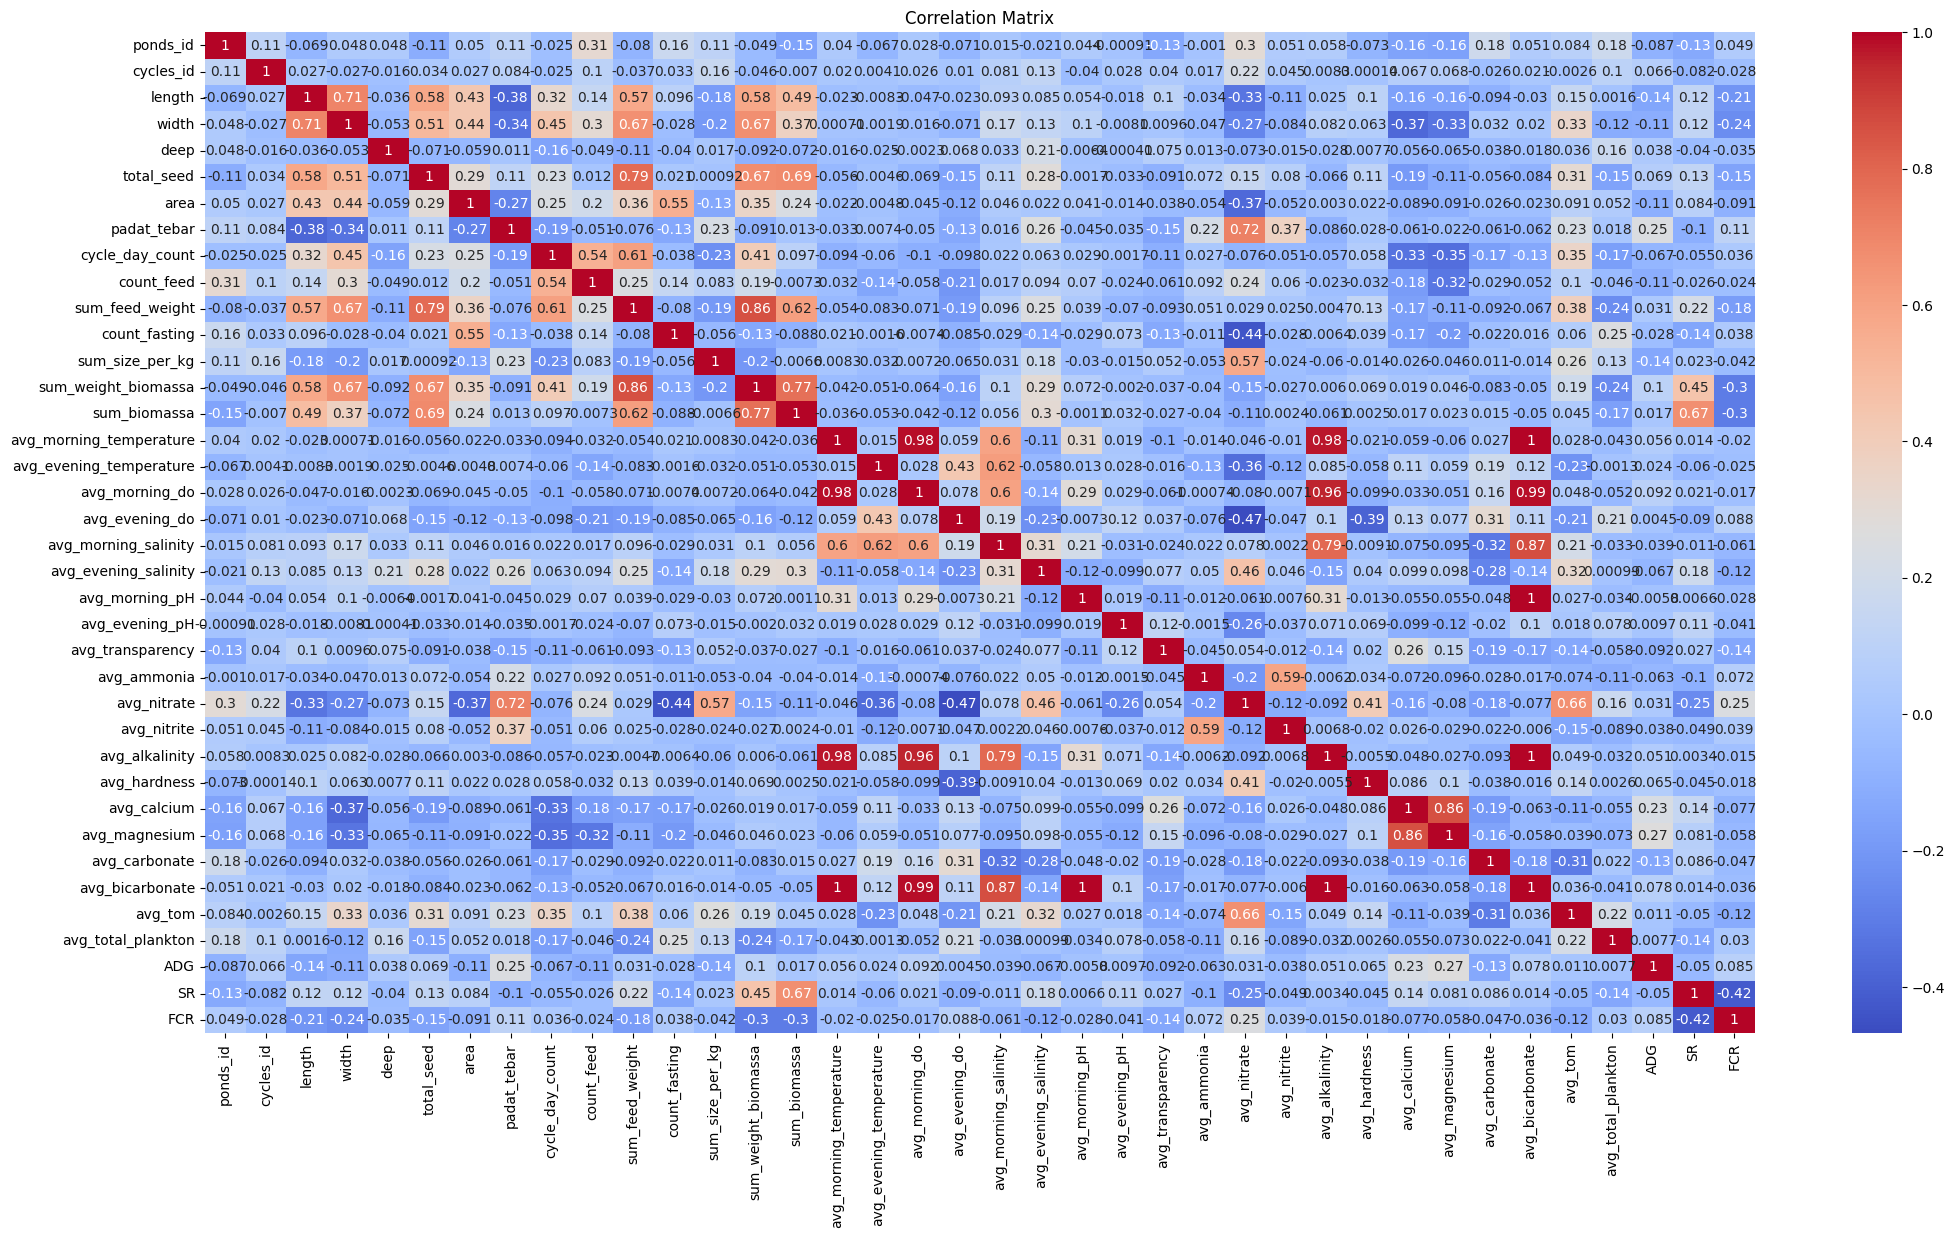

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = data_pond.select_dtypes(include=[np.number]).columns
numeric_data = data_pond[numeric_columns]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(25, 13), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

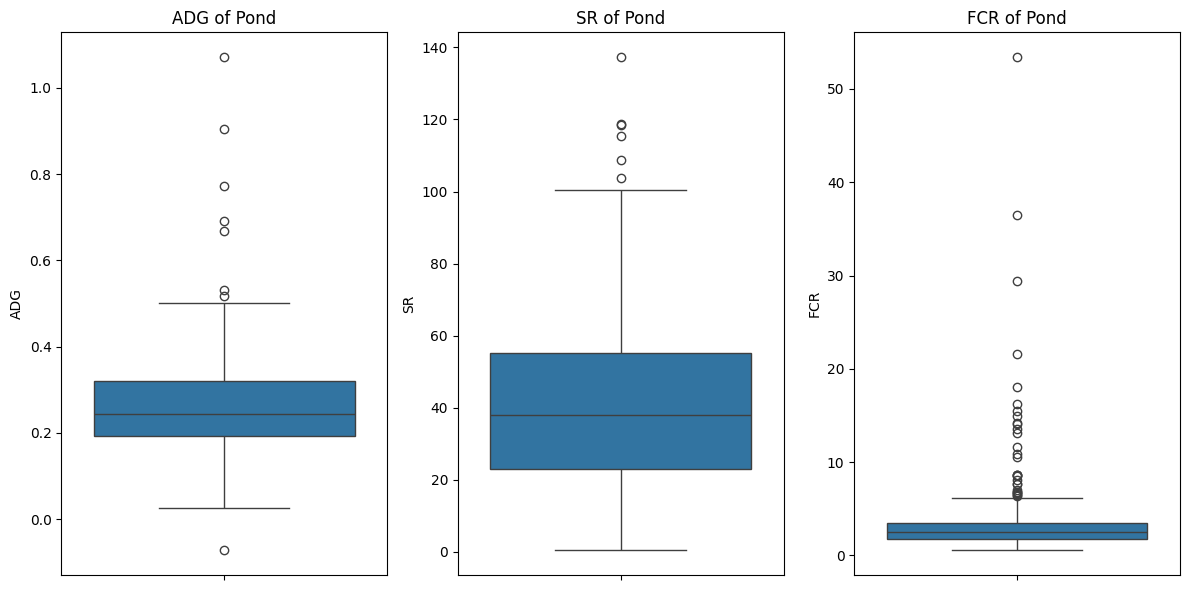

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=data_pond, y='ADG')
plt.title('ADG of Pond')

plt.subplot(1, 3, 2)
sns.boxplot(data=data_pond, y='SR')
plt.title('SR of Pond')

plt.subplot(1, 3, 3)
sns.boxplot(data=data_pond, y='FCR')
plt.title('FCR of Pond')

plt.tight_layout()
plt.show()

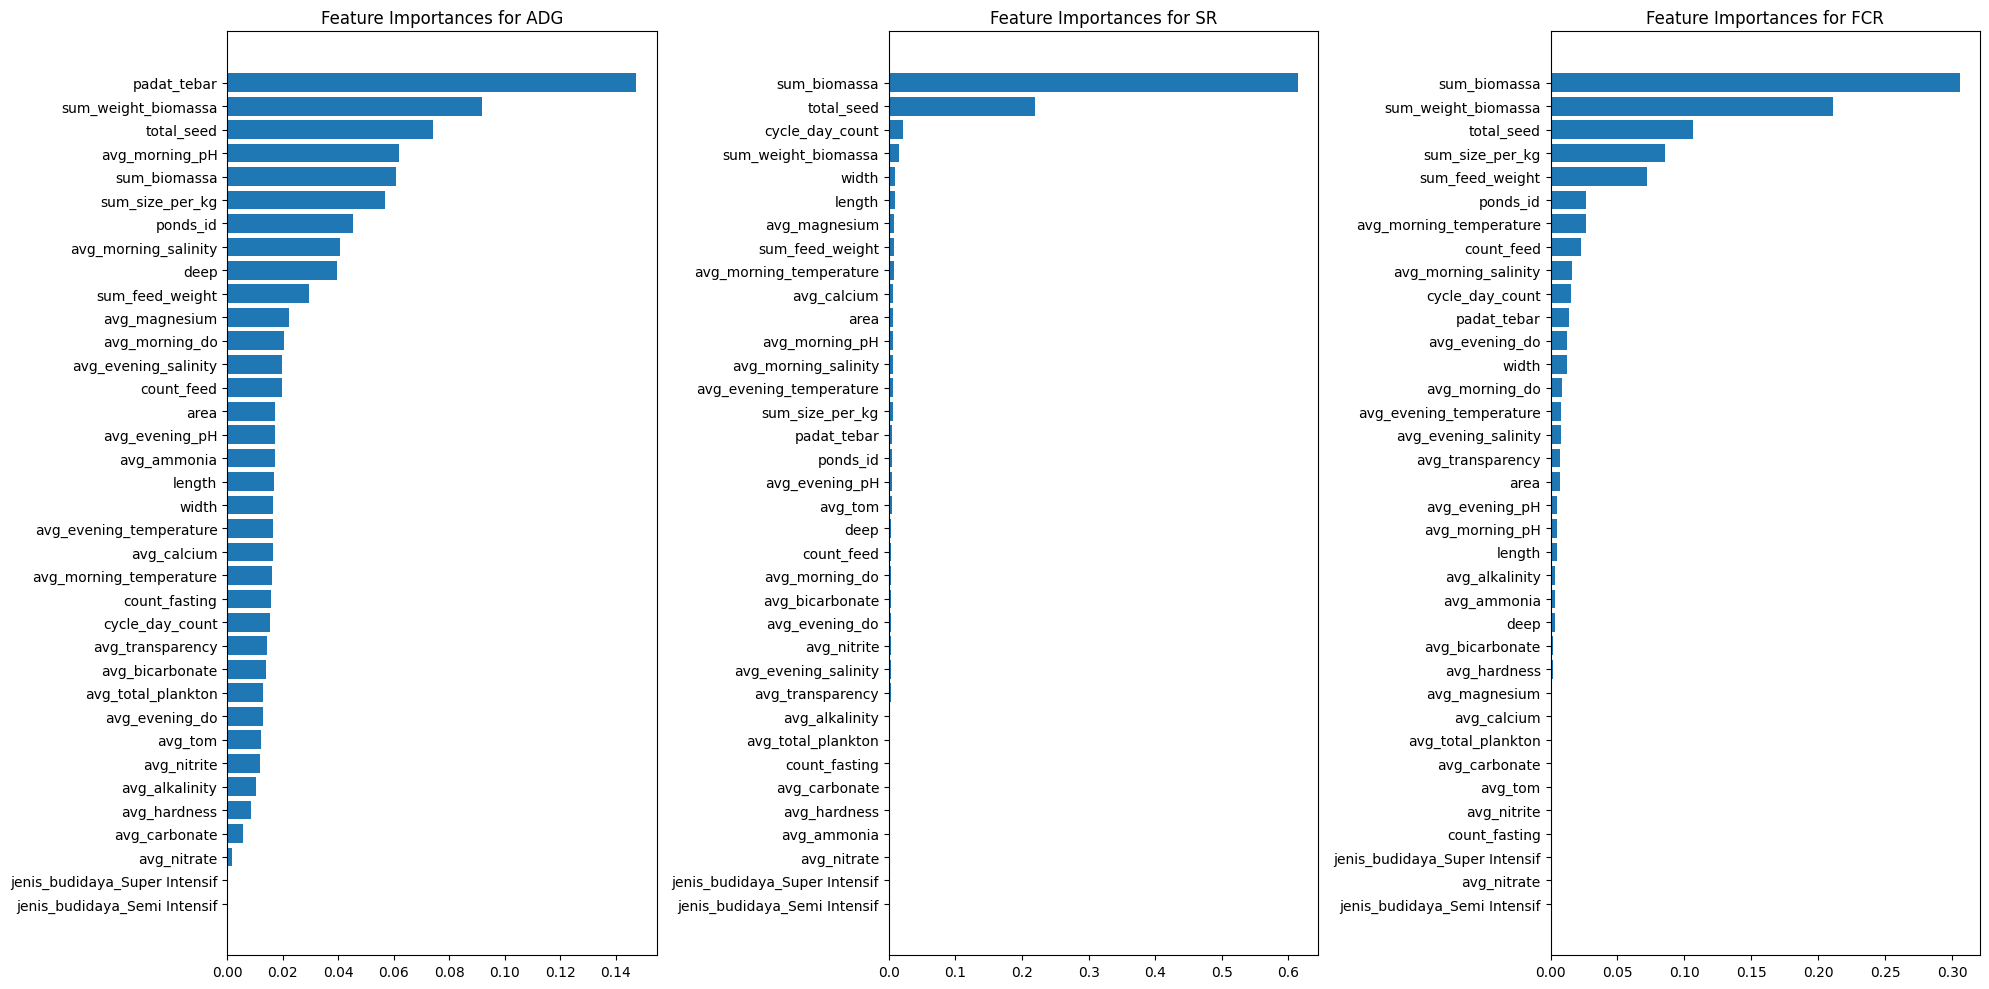

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Memisahkan fitur dan target
X = data_pond.drop(columns=['cycles_id', 'started_at', 'finished_at', 'ADG', 'SR', 'FCR'])
X = pd.get_dummies(X, drop_first=True)  # Mengubah variabel kategorikal menjadi numerik

# Model untuk masing-masing target
y_adg = data_pond['ADG']
y_sr = data_pond['SR']
y_fcr = data_pond['FCR']

model_adg = RandomForestRegressor(random_state=42)
model_sr = RandomForestRegressor(random_state=42)
model_fcr = RandomForestRegressor(random_state=42)

X = X.fillna(X.median())

model_adg.fit(X, y_adg)
model_sr.fit(X, y_sr)
model_fcr.fit(X, y_fcr)

# Mendapatkan feature importances
importances_adg = model_adg.feature_importances_
importances_sr = model_sr.feature_importances_
importances_fcr = model_fcr.feature_importances_

# Plot feature importances
features = X.columns
indices_adg = np.argsort(importances_adg)
indices_sr = np.argsort(importances_sr)
indices_fcr = np.argsort(importances_fcr)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('Feature Importances for ADG')
plt.barh(range(len(indices_adg)), importances_adg[indices_adg], align='center')
plt.yticks(range(len(indices_adg)), [features[i] for i in indices_adg])

plt.subplot(1, 3, 2)
plt.title('Feature Importances for SR')
plt.barh(range(len(indices_sr)), importances_sr[indices_sr], align='center')
plt.yticks(range(len(indices_sr)), [features[i] for i in indices_sr])

plt.subplot(1, 3, 3)
plt.title('Feature Importances for FCR')
plt.barh(range(len(indices_fcr)), importances_fcr[indices_fcr], align='center')
plt.yticks(range(len(indices_fcr)), [features[i] for i in indices_fcr])

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.index

# Mendeteksi outliers pada masing-masing kolom
outliers_adg = detect_outliers_iqr(data_pond, 'ADG')
outliers_sr = detect_outliers_iqr(data_pond, 'SR')
outliers_fcr = detect_outliers_iqr(data_pond, 'FCR')

# Menggabungkan semua indeks outliers
all_outliers = set(outliers_adg).union(set(outliers_sr)).union(set(outliers_fcr))

# Mengonversi set all_outliers menjadi list
all_outliers_list = list(all_outliers)

# Membuat dataset yang memiliki outliers
df_with_outliers = pd.DataFrame(data_pond.loc[all_outliers_list])

# Membuat dataset yang tidak memiliki outliers
df_without_outliers = pd.DataFrame(data_pond.drop(index=all_outliers_list))

In [ ]:
from scipy.stats import ttest_ind

# List semua kolom numerik
numerical_cols_with_outliers = df_with_outliers.select_dtypes(include=['number']).columns.tolist()
numerical_cols_without_outliers = df_without_outliers.select_dtypes(include=['number']).columns.tolist()

# Mengisi nilai-nilai yang hilang dengan median untuk setiap kolom numerik
df_with_outliers[numerical_cols_with_outliers] = df_with_outliers[numerical_cols_with_outliers].fillna(df_with_outliers[numerical_cols_with_outliers].median())
df_without_outliers[numerical_cols_without_outliers] = df_without_outliers[numerical_cols_without_outliers].fillna(df_without_outliers[numerical_cols_without_outliers].median())

# Lakukan uji t-test untuk setiap kolom numerik di kedua dataset
for col in numerical_cols_with_outliers:
    t_stat, p_val = ttest_ind(df_with_outliers[col], df_without_outliers[col])
    print(f'T-test between {col} with outliers and {col} without outliers:')
    print(f'T-statistic: {t_stat}, P-value: {p_val}')
    if p_val < 0.05:
        print(f'P-value is less than 0.05, there is significant difference between the columns.\n')
    else:
        print(f'P-value is greater than or equal to 0.05, there is no significant difference between the columns.\n')

T-test between ponds_id with outliers and ponds_id without outliers:
T-statistic: 0.7306474093106093, P-value: 0.4654847502267552
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between cycles_id with outliers and cycles_id without outliers:
T-statistic: 0.2522966759932, P-value: 0.8009602757164231
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between length with outliers and length without outliers:
T-statistic: -3.0471448127656906, P-value: 0.0024863179506887565
P-value is less than 0.05, there is significant difference between the columns.

T-test between width with outliers and width without outliers:
T-statistic: -4.114193316570221, P-value: 4.851294012753327e-05
P-value is less than 0.05, there is significant difference between the columns.

T-test between deep with outliers and deep without outliers:
T-statistic: -0.8718203674438739, P-value: 0.38390573573091125


In [ ]:
grouped_data_outliers = df_with_outliers.groupby('jenis_budidaya')
grouped_data_without_outliers = df_without_outliers.groupby('jenis_budidaya')

sederhana_data_outliers = grouped_data_outliers.get_group('Sederhana') if 'Sederhana' in grouped_data_outliers.groups else pd.DataFrame()
semi_intensif_data_outliers = grouped_data_outliers.get_group('Semi Intensif') if 'Semi Intensif' in grouped_data_outliers.groups else pd.DataFrame()
intensif_data_outliers = grouped_data_outliers.get_group('Intensif') if 'Intensif' in grouped_data_outliers.groups else pd.DataFrame()
super_intensif_data_outliers = grouped_data_outliers.get_group('Super Intensif') if 'Super Intensif' in grouped_data_outliers.groups else pd.DataFrame()

sederhana_data_without_outliers = grouped_data_without_outliers.get_group('Sederhana') if 'Sederhana' in grouped_data_without_outliers.groups else pd.DataFrame()
semi_intensif_data_without_outliers = grouped_data_without_outliers.get_group('Semi Intensif') if 'Semi Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()
intensif_data_without_outliers = grouped_data_without_outliers.get_group('Intensif') if 'Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()
super_intensif_data_without_outliers = grouped_data_without_outliers.get_group('Super Intensif') if 'Super Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()

In [ ]:
# Daftar kolom yang ingin dibandingkan
selected_columns = ['length', 'width', 'padat_tebar', 'sum_feed_weight', 'sum_weight_biomassa', 'sum_biomassa', 'avg_evening_do',
                    'avg_morning_salinity', 'avg_evening_salinity', 'avg_calcium', 'avg_magnesium', 'avg_tom']

# Fungsi untuk menghitung interval nilai dan nilai yang paling stabil (modus) pada setiap kolom dalam dataframe
def get_non_empty_stats(df, columns):
    stats = {}
    if not df.empty:
        for column in columns:
            min_val = df[column].min()
            max_val = df[column].max()
            mode_val = df[column].mode()[0] if not df[column].mode().empty else None
            stats[column] = {
                'min': min_val,
                'max': max_val,
                'mode': mode_val
            }
    return stats

# Mendapatkan statistik untuk kedua dataset hanya pada kolom yang dipilih
stats_sederhana_data_outliers = get_non_empty_stats(sederhana_data_outliers, selected_columns)
stats_semi_intensif_data_outliers = get_non_empty_stats(semi_intensif_data_outliers, selected_columns)
stats_intensif_data_outliers = get_non_empty_stats(intensif_data_outliers, selected_columns)
stats_super_intensif_data_outliers = get_non_empty_stats(super_intensif_data_outliers, selected_columns)

stats_sederhana_data_without_outliers = get_non_empty_stats(sederhana_data_without_outliers, selected_columns)
stats_semi_intensif_data_without_outliers = get_non_empty_stats(semi_intensif_data_without_outliers, selected_columns)
stats_intensif_data_without_outliers = get_non_empty_stats(intensif_data_without_outliers, selected_columns)
stats_super_intensif_data_without_outliers = get_non_empty_stats(super_intensif_data_without_outliers, selected_columns)

In [ ]:
datasets = {
    'sederhana_data_outliers': sederhana_data_outliers,
    'semi_intensif_data_outliers': semi_intensif_data_outliers,
    'intensif_data_outliers': intensif_data_outliers,
    'super_intensif_data_outliers': super_intensif_data_outliers,
    'sederhana_data_without_outliers': sederhana_data_without_outliers,
    'semi_intensif_data_without_outliers': semi_intensif_data_without_outliers,
    'intensif_data_without_outliers': intensif_data_without_outliers,
    'super_intensif_data_without_outliers': super_intensif_data_without_outliers
}

for name, df in datasets.items():
    if df.empty:
        print(f"Kosong: {name}")
    else:
        print(f"Tidak Kosong: {name}")


Kosong: sederhana_data_outliers
Kosong: semi_intensif_data_outliers
Tidak Kosong: intensif_data_outliers
Tidak Kosong: super_intensif_data_outliers
Kosong: sederhana_data_without_outliers
Tidak Kosong: semi_intensif_data_without_outliers
Tidak Kosong: intensif_data_without_outliers
Tidak Kosong: super_intensif_data_without_outliers


In [ ]:
# Membuat dataframe perbandingan interval dan nilai yang paling stabil
comparison = pd.DataFrame({
    'semi_intensif_data_without_outliers_min': {col: stats_semi_intensif_data_without_outliers[col]['min'] for col in selected_columns},
    'semi_intensif_data_without_outliers_max': {col: stats_semi_intensif_data_without_outliers[col]['max'] for col in selected_columns},

    'intensif_data_outliers_min': {col: stats_intensif_data_outliers[col]['min'] for col in selected_columns},
    'intensif_data_outliers_max': {col: stats_intensif_data_outliers[col]['max'] for col in selected_columns},
    'intensif_data_without_outliers_min': {col: stats_intensif_data_without_outliers[col]['min'] for col in selected_columns},
    'intensif_data_without_outliers_max': {col: stats_intensif_data_without_outliers[col]['max'] for col in selected_columns},

    'super_intensif_data_outliers_min': {col: stats_super_intensif_data_outliers[col]['min'] for col in selected_columns},
    'super_intensif_data_outliers_max': {col: stats_super_intensif_data_outliers[col]['max'] for col in selected_columns},
    'super_intensif_data_without_outliers_min': {col: stats_super_intensif_data_without_outliers[col]['min'] for col in selected_columns},
    'super_intensif_data_without_outliers_max': {col: stats_super_intensif_data_without_outliers[col]['max'] for col in selected_columns},

    'semi_intensif_data_without_outliers_mode': {col: stats_semi_intensif_data_without_outliers[col]['mode'] for col in selected_columns},

    'intensif_data_outliers_mode': {col: stats_intensif_data_outliers[col]['mode'] for col in selected_columns},
    'intensif_data_without_outliers_mode': {col: stats_intensif_data_without_outliers[col]['mode'] for col in selected_columns},

    'super_intensif_data_outliers_mode': {col: stats_super_intensif_data_outliers[col]['mode'] for col in selected_columns},
    'super_intensif_data_without_outliers_mode': {col: stats_super_intensif_data_without_outliers[col]['mode'] for col in selected_columns},
})

comparison = pd.DataFrame(comparison)
comparison = comparison.T
comparison

,length,width,padat_tebar,sum_feed_weight,sum_weight_biomassa,sum_biomassa,avg_evening_do,avg_morning_salinity,avg_evening_salinity,avg_calcium,avg_magnesium,avg_tom
semi_intensif_data_without_outliers_min,54.70,41.02,7.040000,3187.520,1470.86,107299.2370,2.819500,23.661952,19.460000,381.538462,1026.923077,96.142857
semi_intensif_data_without_outliers_max,55.53,41.65,10.500000,6532.440,2015.90,169537.1900,4.659000,24.478723,19.558000,397.142857,1031.857143,102.307692
intensif_data_outliers_min,25.00,30.00,16.000320,325.000,20.00,2500.0000,6.171772,5.034515,4.634800,537.500000,1700.000000,58.048000
intensif_data_outliers_max,70.71,70.71,50.000000,4660.000,2325.00,86955.0000,10.359385,24.753846,23.650000,740.000000,3880.000000,59.452381
intensif_data_without_outliers_min,25.00,14.00,22.321429,14.600,25.00,5900.0000,5.083702,5.555814,6.017391,402.444444,1137.888889,65.133333
intensif_data_without_outliers_max,70.71,70.71,50.000000,10619.000,5472.00,183018.0000,8.580312,34.083333,32.000000,850.000000,3933.333333,94.213333
super_intensif_data_outliers_min,3.50,2.00,50.001000,17.325,0.59,59.0000,3.840500,8.540608,8.302589,219.333333,606.730769,38.000000
super_intensif_data_outliers_max,95.00,70.71,1851.851852,10846.250,10300.00,427862.5016,22.161522,36.288889,35.600000,2000.000000,4361.904762,96.666667
super_intensif_data_without_outliers_min,3.00,2.00,50.001000,19.670,4.21,210.5000,1.329000,4.138889,4.132075,0.000000,0.000000,0.000000
super_intensif_data_without_outliers_max,222.50,70.71,779.220779,29497.900,10369.10,752840.0000,16.436364,192.300000,46.244580,2000.000000,6094.000000,156.000000
